In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
arqvs = os.listdir('./outputs')

In [7]:
dicio = {}
for arqv in arqvs:
    moeda = arqv.split('_')[2].split('.')[0]
    with open(f'./outputs/{arqv}') as f:
        data = json.load(f)
    base = data['Data']['Data']
    dates = [item['time'] for item in base]
    hist_fech = [item['close'] for item in base]
    hist_abert = [item['open'] for item in base]
    hist_vol = [item['volumeto'] for item in base]
    dicio[moeda] = {
        'data': dates,
        'hist_fech': hist_fech,
        'hist_abert': hist_abert,
        'hist_vol': hist_vol
    }

In [31]:
df_fech = df_abert = df_vol = pd.DataFrame(index=dates)
for moeda in dicio.keys():
    datas = dicio[moeda]['data']
    hist_fech = dicio[moeda]['hist_fech']
    df_f = pd.DataFrame(index=datas, data=hist_fech, columns=[moeda])
    df_a = pd.DataFrame(index=datas, data=hist_abert, columns=[moeda])
    df_v = pd.DataFrame(index=datas, data=hist_vol, columns=[moeda])
    df_fech = df_fech.join(df_f)
    df_abert = df_abert.join(df_a)
    df_vol = df_vol.join(df_v)



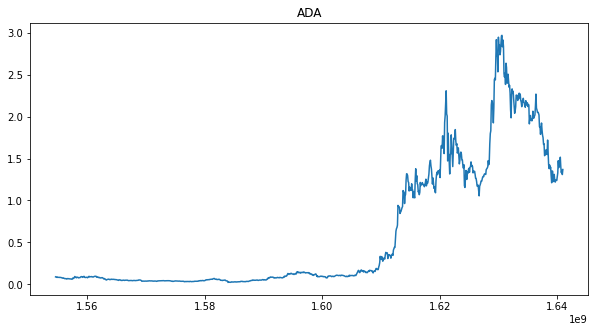

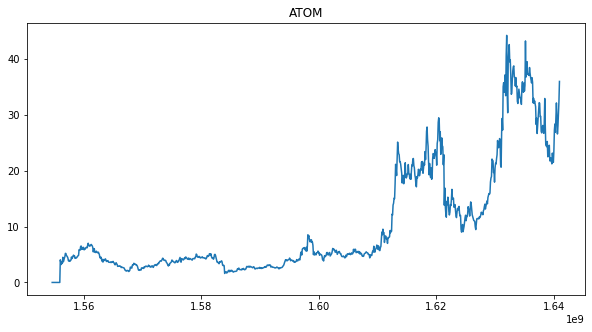

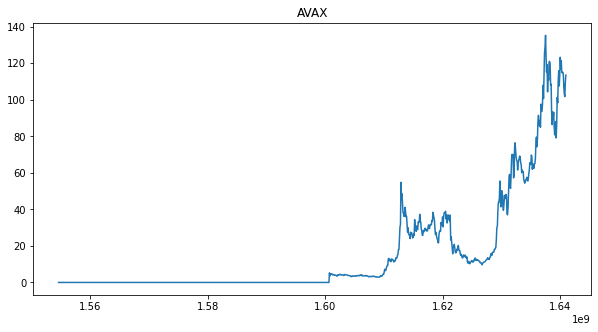

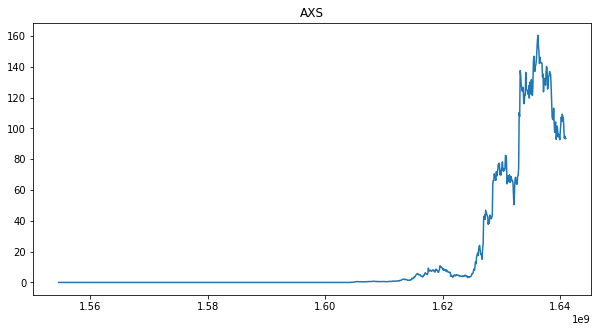

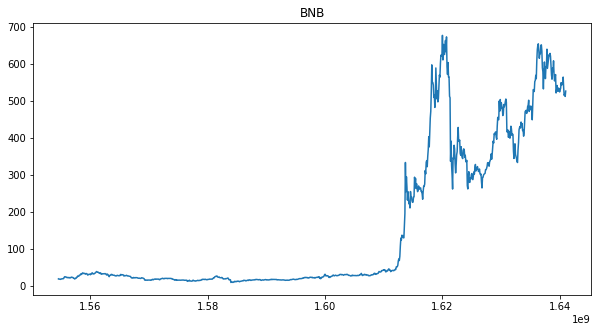

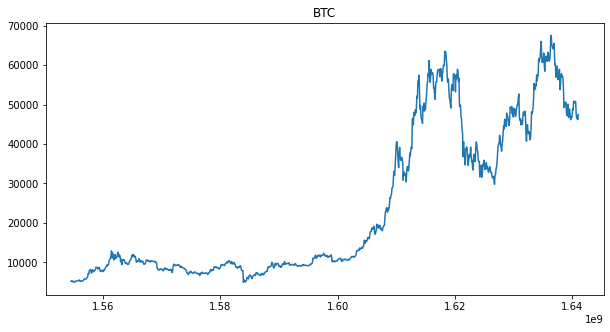

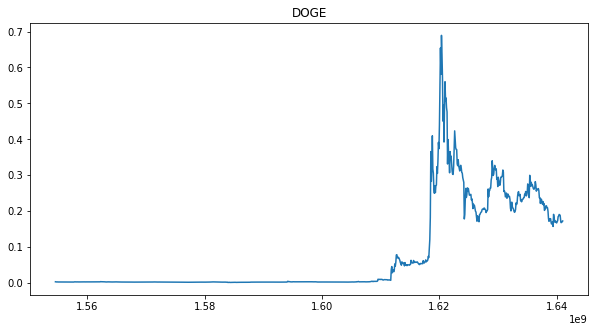

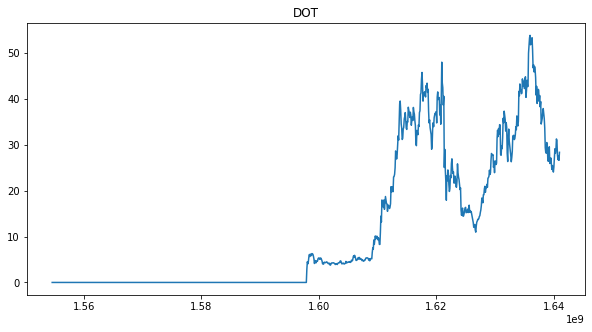

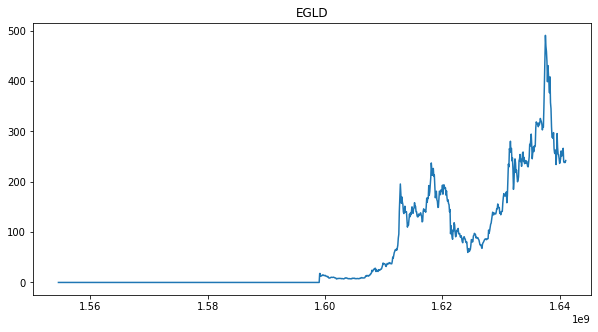

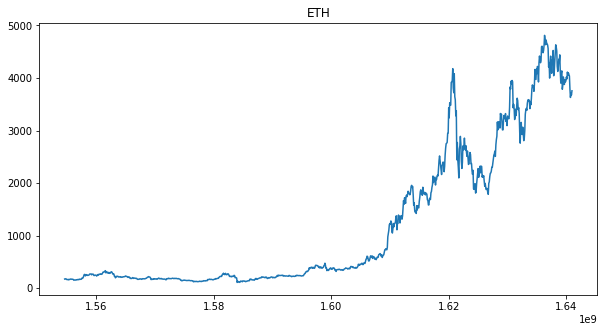

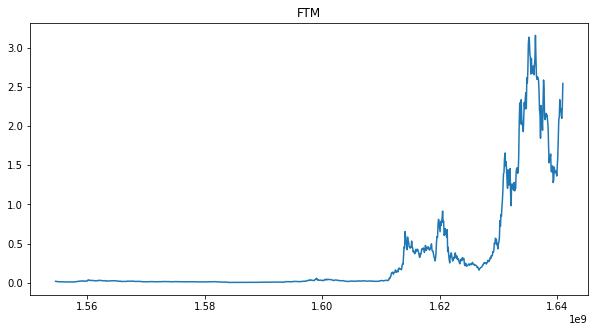

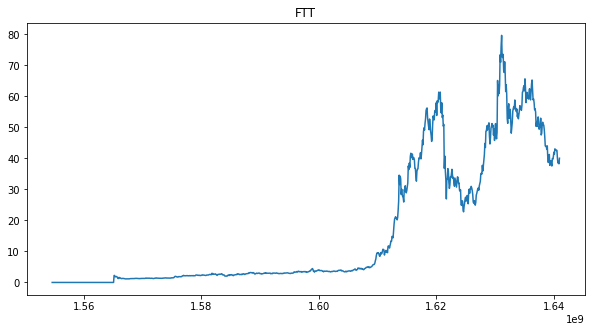

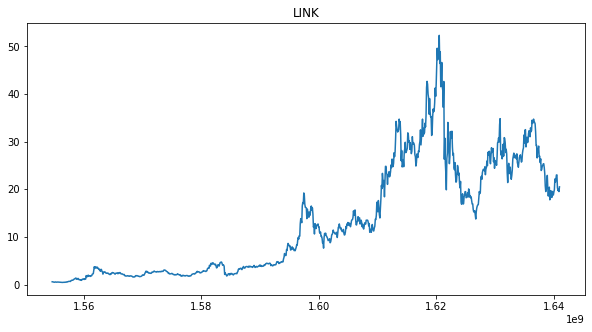

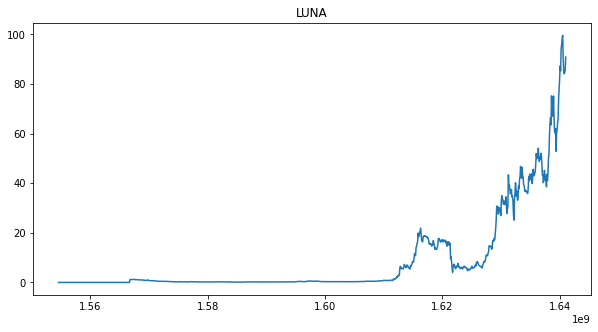

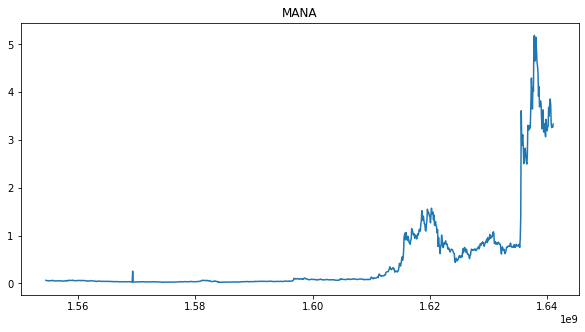

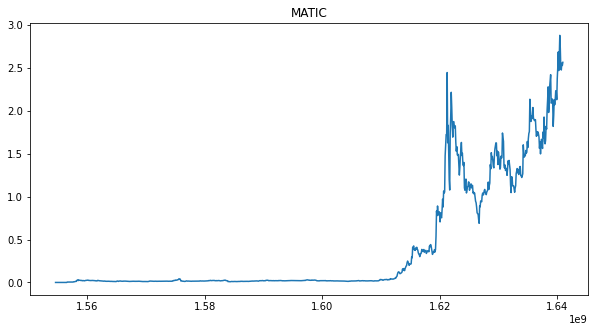

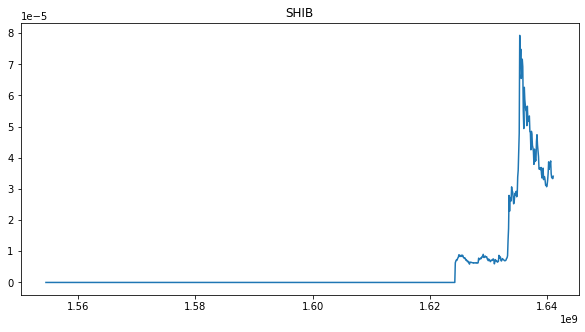

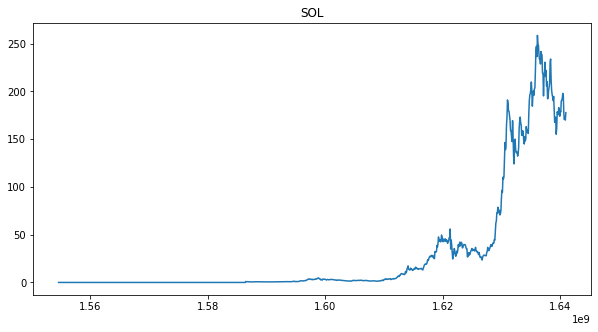

In [47]:
for moeda in dicio.keys():
    plt.figure(figsize=(10, 5))
    plt.plot(df_fech[moeda])
    plt.title(label=moeda)
    plt.show()
    